In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#names = ["id","age","smoker","alive","dead"]
data = pd.read_csv("./smoking.data",delim_whitespace=True)

In [134]:
data

,id,age,smoker,alive,dead
0,1,18-24,1,53,2
1,2,18-24,0,61,1
2,3,25-34,1,121,3
3,4,25-34,0,152,5
4,5,35-44,1,95,14
5,6,35-44,0,114,7
6,7,45-54,1,103,27
7,8,45-54,0,66,12
8,9,55-64,1,64,51
9,10,55-64,0,81,40


In [135]:
data.pivot_table(index="smoker",values=["alive",'dead'],aggfunc=np.sum,margins=True)

,alive,dead
smoker,,
0,502.0,230.0
1,443.0,139.0
All,945.0,369.0


In [136]:
from __future__ import division
data['prop_alive'] = 100*data["alive"]/(data["alive"]+data["dead"])
data['prop_dead'] = 100*data["dead"]/(data["alive"]+data["dead"])

In [137]:
import random
#f,axes = plt.subplots(2,2,sharex=True,sharey=True)

x1 = [random.randint(12,40) for _ in range(40)]
e1 = [np.random.normal(0,6) for _ in range(40)]
y1 = [82-.15*x1[i]+e1[i] for i in range(40)]
age1 = ["15-34" for _ in range(40)]
#axes[0,0].scatter(x1,y1)


x2 = [random.randint(5,30) for _ in range(40)]
e2 = [np.random.normal(0,5) for _ in range(40)]
y2 = [75-.3*x2[i]+e2[i] for i in range(40)]
age2 = ["35-54" for _ in range(40)]
#axes[0,1].scatter(x2,y2)
#plt.show()

x3 = [random.randint(0,30) for _ in range(40)]
e3 = [np.random.normal(0,4) for _ in range(40)]
y3 = [68-.45*x3[i]+e3[i] for i in range(40)]
age3 = ["55+" for _ in range(40)]
#axes[1,0].scatter(x3,y3)
#plt.show()

x4 = x1 + x2 + x3
y4 = y1 + y2 + y3
age4 = age1 + age2 + age3
#axes[1,1].scatter(x4,y4,color="g")
#plt.show()

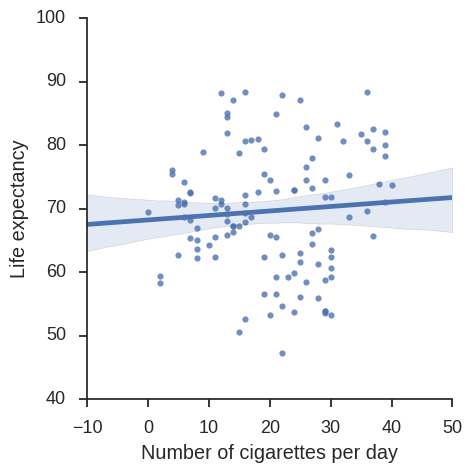

In [138]:
x=x4
y=y4
age=age4
sns.set(style="ticks", context="talk")
data = {"x":x,"y":y,"age":age}
df = pd.DataFrame(data)
g = sns.lmplot(x="x",y="y",data=df)
g.set_axis_labels("Number of cigarettes per day", "Life expectancy")
plt.show()

In [139]:
import statsmodels.api as sm
x_fit = sm.add_constant(x) # Without it intercept is excluded
model = sm.OLS(y, x_fit).fit()
predictions = model.predict(x_fit)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.6664
Date:                Wed, 26 Oct 2016   Prob (F-statistic):              0.416
Time:                        17:42:19   Log-Likelihood:                -440.34
No. Observations:                 120   AIC:                             884.7
Df Residuals:                     118   BIC:                             890.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         68.2221      1.958     34.844      0.0

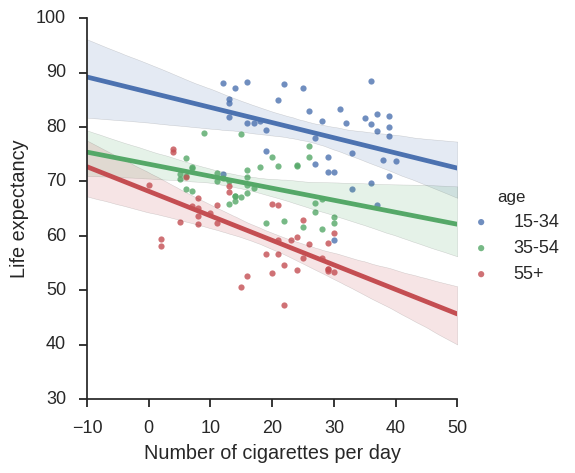

In [140]:
f = sns.lmplot(x="x",y="y",hue="age",data=df)
f.set_axis_labels("Number of cigarettes per day", "Life expectancy")
plt.show()

In [142]:
import random
#f,axes = plt.subplots(2,2,sharex=True,sharey=True)

xm = [random.randint(18,40) for _ in range(40)]
em = [np.random.normal(0,10)+5 for _ in range(40)]
ym = [5-.5*xm[i]+em[i] for i in range(40)]
sexm = ["Male" for _ in range(40)]
#axes[0,0].scatter(x1,y1)


xf = [random.randint(0,22) for _ in range(40)]
ef = [np.random.normal(0,5) for _ in range(40)]
yf = [-5-.75*xf[i]+ef[i] for i in range(40)]
sexf = ["Female" for _ in range(40)]
#axes[0,1].scatter(x2,y2)
#plt.show()

xt = xm + xf 
yt = ym + yf 
sext = sexm + sexf

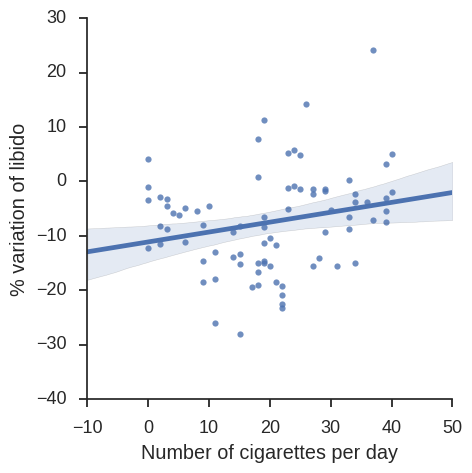

In [143]:
import seaborn as sns
x=xt
y=yt
sex=sext
sns.set(style="ticks", context="talk")
data = {"x":xt,"y":yt,"sex":sext}
df = pd.DataFrame(data)
g = sns.lmplot(x="x",y="y",data=df)
g.set_axis_labels("Number of cigarettes per day", "% variation of libido")
plt.show()

In [144]:
import statsmodels.api as sm
x_fit = sm.add_constant(x) # Without it intercept is excluded
model = sm.OLS(y, x_fit).fit()
predictions = model.predict(x_fit)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     4.252
Date:                Wed, 26 Oct 2016   Prob (F-statistic):             0.0425
Time:                        17:42:37   Log-Likelihood:                -288.10
No. Observations:                  80   AIC:                             580.2
Df Residuals:                      78   BIC:                             585.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -11.1131      2.019     -5.504      0.0

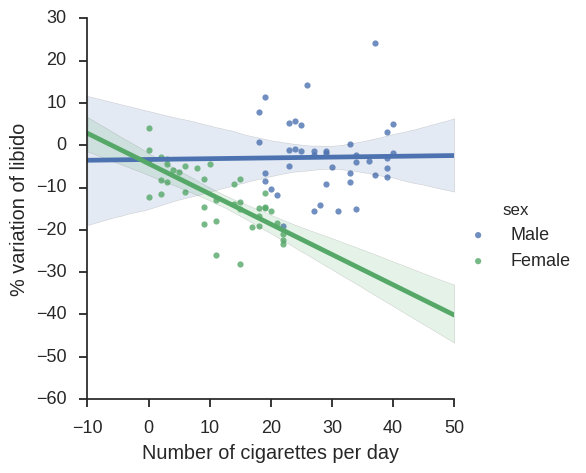

In [145]:
f = sns.lmplot(x="x",y="y",hue="sex",data=df)
f.set_axis_labels("Number of cigarettes per day", "% variation of libido")
plt.show()

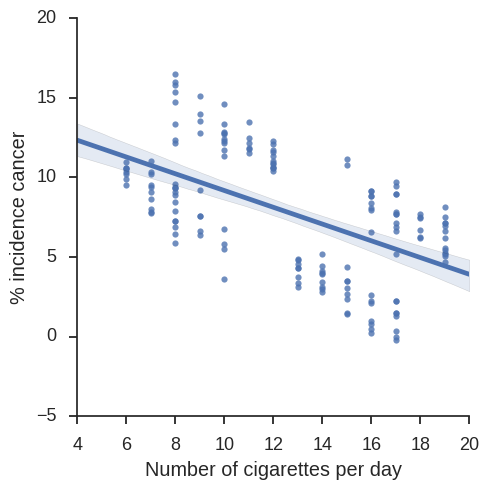

In [201]:
import random
#f,axes = plt.subplots(2,2,sharex=True,sharey=True)

ar = (8,10)
nr = (10,15)
ap = (15,5)
nP = (17,10)
std = 2

xap = [random.randint(ap[0]-2,ap[0]+2) for _ in range(40)]
e = [np.random.normal(0,1) for _ in range(40)]
yap = [ap[1]+e[i]-1*(xap[i]-np.min(xap)) for i in range(40)]
sap = ["Pack" for _ in range(40)]
aap = ["Athlete" for _ in range(40)]
lap = ["Pack + Athlete" for _ in range(40)]

xnp = [random.randint(nP[0]-2,nP[0]+2) for _ in range(40)]
e = [np.random.normal(0,1) for _ in range(40)]
ynp = [nP[1]+e[i]-1*(xnp[i]-np.min(xnp)) for i in range(40)]
snp = ["Pack" for _ in range(40)]
anp = ["Non Athlete" for _ in range(40)]
lnp = ["Pack + NonAthlete" for _ in range(40)]

xar = [random.randint(ar[0]-2,ar[0]+2) for _ in range(40)]
e = [np.random.normal(0,1) for _ in range(40)]
yar = [ar[1]+e[i]-1*(xar[i]-np.min(xar)) for i in range(40)]
sar = ["Rolled" for _ in range(40)]
aar = ["Athlete" for _ in range(40)]
lar = ["Rolled + Athlete" for _ in range(40)]

xnr = [random.randint(nr[0]-2,nr[0]+2) for _ in range(40)]
e = [np.random.normal(0,1) for _ in range(40)]
ynr = [nr[1]+e[i]-1*(xnr[i]-np.min(xnr)) for i in range(40)]
snr = ["Rolled" for _ in range(40)]
anr = ["Non Athletes" for _ in range(40)]
lnr = ["Rolled + NonAthlete" for _ in range(40)]

x = xap + xnp + xar + xnr
y = yap + ynp + yar + ynr
s = sap + snp + sar + snr
a = aap + anp + aar + anr
l = lap + lnp + lar + lnr

data = {"x":x,"y":y,"smoke":s,"athlet":a,"label":l}
df = pd.DataFrame(data)

f = sns.lmplot(x="x",y="y",data=df)
f.set_axis_labels("Number of cigarettes per day", "% incidence cancer")
plt.show()

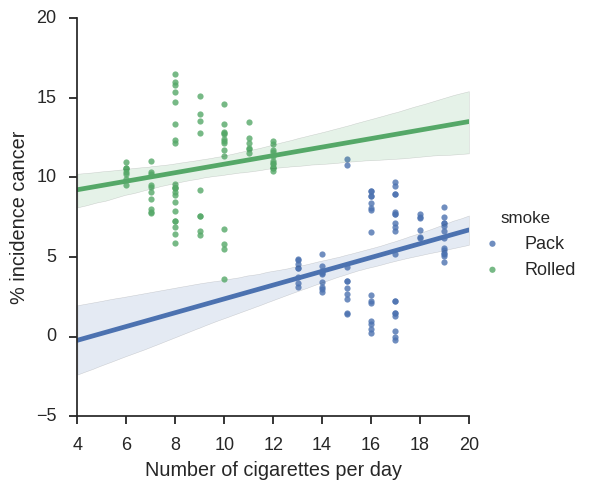

In [202]:
f = sns.lmplot(x="x",y="y",hue="smoke",data=df)
f.set_axis_labels("Number of cigarettes per day", "% incidence cancer")
plt.show()

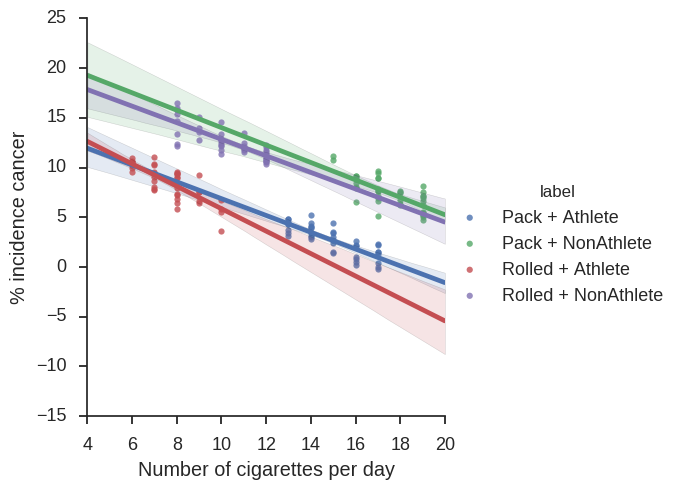

In [204]:
f = sns.lmplot(x="x",y="y",hue="label",data=df)
f.set_axis_labels("Number of cigarettes per day", "% incidence cancer")
plt.show()